<a href="https://colab.research.google.com/github/Bhupathiadithya/Data-Analysis-using-python-new/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Length of data: 10
Data type of completion times: int64
Categories data type: <class 'pandas.core.arrays.categorical.Categorical'>
Categories structure: Index(['Fast Learner', 'On Time', 'Needs Support'], dtype='object')

Summary of Learner Types:
                Frequency  Proportion
Fast Learner           3         0.3
On Time                4         0.4
Needs Support          3         0.3

Mean: 28.4
Median: 28.5
Standard Deviation: 6.397916327472041

Pass Rate: 0.7


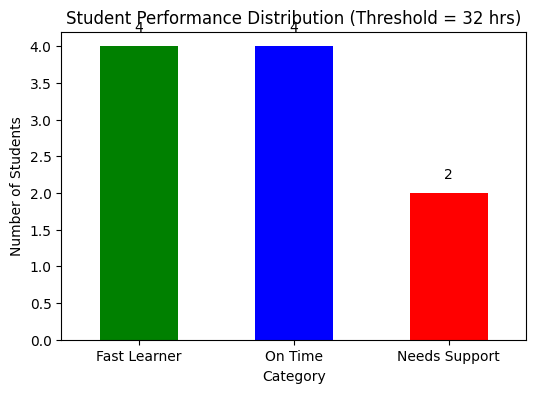

Pass Rate: 0.8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Data Creation & Categorization
# ----------------------------
# Example data: completion times of 10 students (in hours)
completion_times = np.array([22, 28, 35, 24, 30, 32, 18, 26, 40, 29])

# Default threshold
threshold = 30

def categorize_students(times, threshold=30, margin=5):
    categories = []
    for t in times:
        if t < threshold - margin:   # Fast Learner
            categories.append("Fast Learner")
        elif threshold - margin <= t <= threshold:  # On Time
            categories.append("On Time")
        else:   # Needs Support
            categories.append("Needs Support")
    return pd.Categorical(
        categories,
        categories=["Fast Learner", "On Time", "Needs Support"],
        ordered=True
    )

categories = categorize_students(completion_times, threshold)

# ----------------------------
# 2. Data Operations
# ----------------------------
print("Length of data:", len(completion_times))
print("Data type of completion times:", completion_times.dtype)
print("Categories data type:", type(categories))
print("Categories structure:", categories.categories)

# Frequency & proportion
freq = pd.Series(categories).value_counts().sort_index()
prop = pd.Series(categories).value_counts(normalize=True).sort_index()

summary = pd.DataFrame({"Frequency": freq, "Proportion": prop})
print("\nSummary of Learner Types:\n", summary)

# ----------------------------
# 3. Descriptive Statistics
# ----------------------------
mean_val = np.mean(completion_times)
median_val = np.median(completion_times)
std_val = np.std(completion_times, ddof=1)  # sample std

print("\nMean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)

# Pass rate: Fast Learner or On Time
passed = np.isin(categories, ["Fast Learner", "On Time"]).sum()
pass_rate = passed / len(completion_times)
print("\nPass Rate:", pass_rate)

# ----------------------------
# 4. Advanced Requirement (Dynamic threshold)
# ----------------------------
def reclassify_and_plot(times, threshold, margin=5):
    new_categories = categorize_students(times, threshold, margin)

    # Frequency for visualization
    freq = pd.Series(new_categories).value_counts().sort_index()

    # Bar chart
    plt.figure(figsize=(6, 4))
    bars = freq.plot(kind="bar", color=["green", "blue", "red"])
    plt.title(f"Student Performance Distribution (Threshold = {threshold} hrs)")
    plt.xlabel("Category")
    plt.ylabel("Number of Students")
    plt.xticks(rotation=0)

    # Annotate values on bars
    for idx, val in enumerate(freq):
        plt.text(idx, val + 0.2, str(val), ha="center")

    plt.show()

    # Pass rate
    passed = np.isin(new_categories, ["Fast Learner", "On Time"]).sum()
    pass_rate = passed / len(times)
    print("Pass Rate:", pass_rate)

    return new_categories, freq

# Example: reclassify with new threshold 32 hours
new_categories, new_freq = reclassify_and_plot(completion_times, threshold=32)